In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

In [152]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [0]:
# Data prep

train_unprep = mnist.load_data()[0]
test_unprep = mnist.load_data()[1]

In [0]:
train_unprep_x = train_unprep[0]
train_unprep_y = train_unprep[1]

test_unprep_x = test_unprep[0]
test_unprep_y = test_unprep[1]

In [0]:
def flatten_image(x):
  return x.flatten()/255

def dummify_label(y):
  vector = [0 for i in range(10)]
  vector[y] = 1
  return vector

train_x = []
train_y = []

test_x = []
test_y = []

for image in train_unprep_x:
  train_x.append(flatten_image(image))

for label in train_unprep_y:
  train_y.append(dummify_label(label))

for image in test_unprep_x:
  test_x.append(flatten_image(image))

for label in test_unprep_y:
  test_y.append(dummify_label(label))

In [0]:
#As array for the neural network model
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

test_x =  np.asarray(test_x)
test_y =  np.asarray(test_y)

In [0]:
model = Sequential()

model.add(Dense(512, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


In [166]:
sgd = SGD(lr=0.1)

model.compile(loss='categorical_crossentropy',optimizer=sgd)
model.fit(train_x, train_y, verbose=1, batch_size=32, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.2529
Epoch 2/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.1000
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0666
Epoch 4/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0479
Epoch 5/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0347
Epoch 6/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0247
Epoch 7/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0180
Epoch 8/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0127
Epoch 9/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0091
Epoch 10/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0059


In [171]:
test_loss = model.evaluate(test_x, test_y)
print(test_loss)

10000/10000 [==============================] - 1s 53us/step
0.06847091197540103


In [168]:
model.predict(test_x[1].reshape(1,784))

array([[8.9476387e-10, 7.7706638e-08, 9.9999988e-01, 2.8511133e-09,
        1.5048908e-18, 9.6719273e-12, 1.6035142e-09, 1.3873501e-13,
        4.4601784e-09, 2.7865409e-19]], dtype=float32)

In [169]:
test_y[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

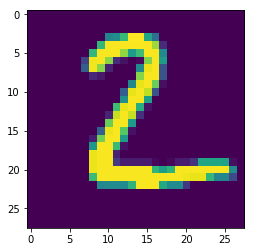

In [170]:
plt.imshow(test_unprep_x[1])